In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('pastel', color_codes=True)
%matplotlib inline

## Sqlite to db

In [6]:
conn = sqlite3.connect('./data/database.sqlite')
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

user
method
grade
ascent


In [11]:
user_q = 'select * from user limit 100'
print('user cols\n', pd.read_sql(user_q, con=conn).columns, '\n')

method_q = 'select * from method limit 100'
print('method cols\n', pd.read_sql(method_q, con=conn).columns, '\n')

grade_q = 'select * from grade limit 100'
print('grade cols\n', pd.read_sql(grade_q, con=conn).columns, '\n')

ascent_q = 'select * from ascent limit 100'
print('ascent cols\n', pd.read_sql(ascent_q, con=conn).columns, '\n')

user cols
 Index(['id', 'first_name', 'last_name', 'city', 'country', 'sex', 'height',
       'weight', 'started', 'competitions', 'occupation', 'sponsor1',
       'sponsor2', 'sponsor3', 'best_area', 'worst_area', 'guide_area',
       'interests', 'birth', 'presentation', 'deactivated', 'anonymous'],
      dtype='object') 

method cols
 Index(['id', 'score', 'shorthand', 'name'], dtype='object') 

grade cols
 Index(['id', 'score', 'fra_routes', 'fra_routes_input', 'fra_routes_selector',
       'fra_boulders', 'fra_boulders_input', 'fra_boulders_selector',
       'usa_routes', 'usa_routes_input', 'usa_routes_selector', 'usa_boulders',
       'usa_boulders_input', 'usa_boulders_selector'],
      dtype='object') 

ascent cols
 Index(['id', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country', 'comment', 'rating'

In [18]:
q = 'select a.*, g.usa_routes from ascent as a left join grade as g on a.grade_id = g.id'
df = pd.read_sql(q, con=conn)

In [19]:
vc_climb_names = df['name'].value_counts()
grade_df = df[['name', 'usa_routes']].groupby('name').first()

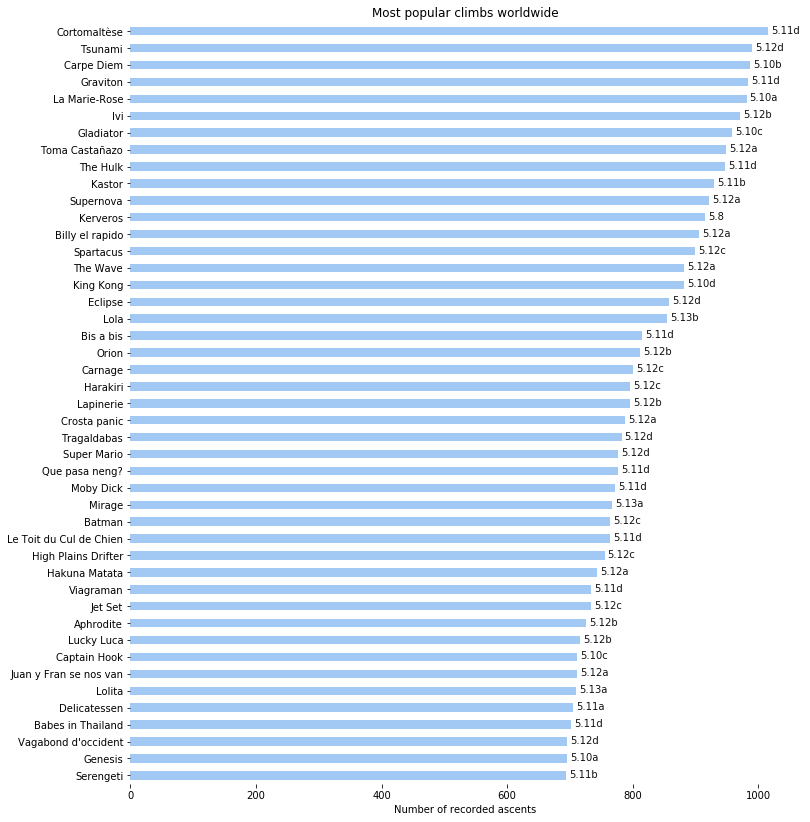

In [50]:
top_n = 45
dsp = {'bottom': True, 'left': True}

fig, ax = plt.subplots(figsize=(12,14))
vc_climb_names.head(top_n+17).tail(top_n).sort_values().plot(kind='barh', ax=ax)

for i,yv in enumerate(ax.get_yticklabels()):
    lab = yv.get_text()
    x_val = vc_climb_names.loc[lab]
    grade = grade_df.loc[lab].values[0]
    ax.text(x_val + 5, i-0.12, f'{grade}', color='#111111')

ax.set_title('Most popular climbs worldwide')
ax.set_xlabel('Number of recorded ascents')
sns.despine(**dsp)
fig.savefig('./viz/popular_climbs.png')